Day 3 

Exercises: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook.

* What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

That the differnce between people whop have many friends and people who have few friends, in reality, inst not that big as a random network would have you believe. 

* List the four regimes that characterize random networks as a function of ⟨k⟩

subcritical regime, critical point, supercritical regime and connected regime. 

**Connected regime:** 
⟨k⟩ is large enough that almost all nodes are part of a single, connected component.
The network is essentially fully connected except for a few isolated nodes.

**Supercritical regime:**
⟨k⟩ > 1 but not much larger.
A giant connected component exists, containing a significant fraction of the nodes, but there are still many small clusters.

**Critical point:**

⟨k⟩ ≈ 1 The network is at a phase transition. A giant component starts to emerge, but most nodes are still in small clusters.

**Subcritical regime:**
⟨k⟩ < 1.
The network consists mostly of small, isolated clusters. There is no giant connected
    
* According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k)
decreases as a function of *k* in real-world networks?

The whole assumption of random networks goes to shit 

Exercises: WS edition.

First, let's use networkx to play around with WS graphs. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p=0,0.1,
 and 1
. Calculate the average shortest path length ⟨d⟩
 for each one.
Describe what happens to the network when p=1


In [1]:
import matplotlib.pyplot as plt 
import networkx as nx 
import numpy as np 


In [11]:
N_nodes = 500
k_mu = 4 
p_s = [0,0.1,1]
G0 = nx.watts_strogatz_graph(N_nodes,k_mu,p_s[0])
G1 = nx.watts_strogatz_graph(N_nodes,k_mu,p_s[1])
G2 = nx.watts_strogatz_graph(N_nodes,k_mu,p_s[2])
d0 = nx.average_shortest_path_length(G0)
d1 = nx.average_shortest_path_length(G1)
d2 = nx.average_shortest_path_length(G2)

print(f"Average shortest path length for p=0: {np.round(d0,2)}")
print(f"Average shortest path length for p=0.1: {np.round(d1,2)}")
print(f"Average shortest path length for p=1: {np.round(d2,2)}")

Average shortest path length for p=0: 62.88
Average shortest path length for p=0.1: 7.4
Average shortest path length for p=1: 4.73


When p=1 all edges are randomly rewired and we get a totally random network

Generate a lot of networks with different values of p. You will notice that paths are short when p is close to one and they are long when p=0

* What's the value of p for which the average shortest path length gets close to the short paths we find in a fully randomized network.



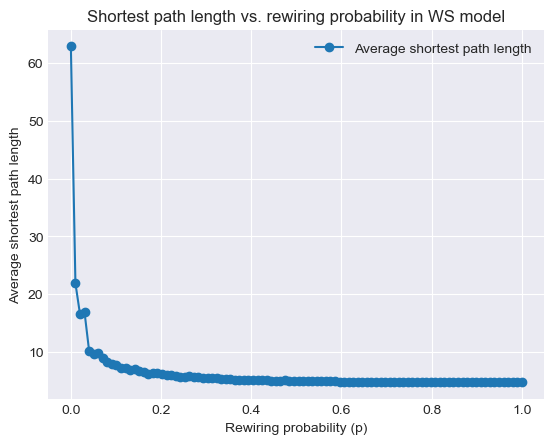

The first value is 0.010101010101010102 which more than halves the average shortest path compared to p_0


In [31]:
p_values = np.linspace(0,1,100)
shortest_d_values = []

for p in p_values:
    G =  nx.watts_strogatz_graph(N_nodes,k_mu,p)
    shortest_d = nx.average_shortest_path_length(G)
    shortest_d_values.append(shortest_d)

plt.errorbar(p_values, shortest_d_values, fmt='o-', label='Average shortest path length')
plt.xlabel('Rewiring probability (p)')
plt.ylabel('Average shortest path length')
plt.title('Shortest path length vs. rewiring probability in WS model')
plt.grid(True)
plt.legend()
plt.show()

print(f"The first value is {p_values[1]} which more than halves the average shortest path compared to p_0")    

In [32]:
print(f"We converge towards {shortest_d_values[99]}")

We converge towards 4.756769539078157


For a rewiring probability only a tiny bit higher than zero we see that the avarage shortest path drops drastically. 
The first value is 0.01 which more than halves the average shortest path compared to p_0

Let's investigate this behavior in detail. Generate 50 networks with N=500, ⟨k⟩=4, for each of p={0,0.01,0.03,0.05,0.1,0.2}. 

* Calculate the average of ⟨d⟩ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. 

* Use the standard deviation to add errorbars to the plot. 

My version of the plot is below (since a picture's worth 1000 words).
Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

In [25]:
p_vals=[0,0.01,0.03,0.05,0.1,0.2]
N_nodes = 500
k_mu = 4 
N = 50
stds = []
mean_shortest_d = []
for p in p_vals:
    shortest_d_values = []
    for _ in range(N):
        G =  nx.watts_strogatz_graph(N_nodes,k_mu,p)
        shortest_d = nx.average_shortest_path_length(G)
        shortest_d_values.append(shortest_d)
    mean_shortest_d.append(np.mean(shortest_d_values))
    std = np.std(shortest_d_values)
    stds.append(std)



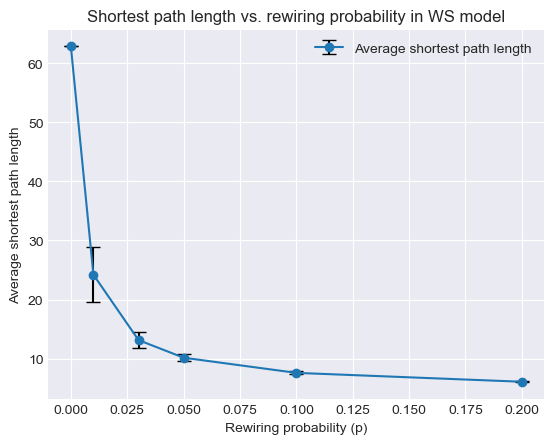

In [36]:
plt.errorbar(p_vals, mean_shortest_d, yerr=stds, fmt='o-', capsize=5, label='Average shortest path length',ecolor='black')
plt.xlabel('Rewiring probability (p)')
plt.ylabel('Average shortest path length')
plt.title('Shortest path length vs. rewiring probability in WS model')
plt.grid(True)
plt.legend()
plt.show()


We observe that the shortest path length drops dramastically as soon as we introduce only a tiny amount of randomness, by setting the rewiring probability 0.1 instead of 0. We also see that the std drops as the rewiring probability increases, meaning that the more random the network is the smaller the standard deviation is in its average shortest path. 

## Part 2 

First a couple of questions to make sure that you've actually read the text.

* What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).

In scale free networks the degree distribution follow a power law distribution: 

$$
p_k \sim k^{-\lambda}
$$
We have three regimes for complex networks

* Anamalous regime $\lambda \leq 2 $. Here the exponent is larger then one and the number of links to the largerst hub grow faster than the number of nodes in the network. This means that large networks of this kind is impossible.

* scale free regime $2 < \lambda <3 $.  Networks here are ultra-small where hubs make path lengths "ultra-short"

* random network regime $3 < \lambda  $ almost indistinguashble from a random network

* What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.